# Assignment 1

In this assignment, you will encounter both pen-and-paper exercises and coding tasks to be solved using Python 3 and the NumPy library. To complete each exercise, utilize the designated cell within this Jupyter notebook. 

For the pen-and-paper exercises, you have the option to submit either a typeset solution or a good-quality digitalized version of your handwritten solution.

As for the Python exercises:

- Refrain from altering the provided code; simply fill in the missing portions as indicated.
- Do not use any additional libraries beyond those already included in the code.
- Make sure that the output of all code cells is visible in your submitted notebook. The evaluator will NOT execute your code before grading your submission.
   
Please identify the authors of this assignment in the cell below.

### Author 1: Thiago Kalid, 2 number
### Author 2: Name, UP number
### Author 3: Name, UP number

## 1. Probability

Suppose you are participating in a quiz competition where, for each question, you are provided with four answer choices, with only one being correct. At a certain point, the quiz host asks you a question for which you have no idea what the correct answer is. The host offers you a bonus that enables you to eliminate one incorrect answer from among two options of your choice. Let us label the four answers as $a$, $b$, $c$, and $d$. 

### 1.1. Pen-and-paper questions

a) What is the probability that you get the correct answer if you answer at random before using the bonus?

There are four alternatives, which only one is the correct one. Then, supposing that I don't have any prior knowladge, the probability of choosing the right answer is 
$$\frac{1}{4}=0.25$$

b) You requested the quiz host to use the bonus and eliminate one incorrect answer from options $a$ and $b$. You then choose the option $a$ or $b$ that remains after the bonus. What is the probability of selecting the correct answer in this scenario? Show all the calculations involved.

Chosen two options, the bonus removes one incorrect. If we choose two wrong options, the bonus will not help, and we will fail. If we choose one right and one wrong, then we will certainly succeed after the bonus, since it will remove the incorrect one. Then, the problem is **as if** we could choose two options and win if one of these two were correct. There are 6 possible pair combinations: (a,b), (a,c), (a,d), (b,c), (b,d), (c,d), where each option is present in 3/6 of the combinations. Assuming that there is only one correct answer, the probability of choosing the right option in this situation is 1/2 or 50%  

### 1.2. Computational simulation

Perform a computational simulation of the scenario described in 1.b) and estimate the desired probability by completing the code below.

In [2]:
import random

NUM_EPISODES = 10000

num_wins = 0
for _ in range(NUM_EPISODES):
    # Pick a random correct answer:
    correct_answer = random.choice(["a", "b", "c", "d"])
    
    # Choose two guesses randomly:
    options = ["a", "b", "c", "d"]
    guess_1 = random.choice(options)
    options.remove(guess_1)
    guess_2 = random.choice(options)
    
    # The bonus will always remove one wrong alternative. It means that as long as we have chosen the correct alternative among our two initial guesses, we will succeed:
    if guess_1 == correct_answer or guess_2 == correct_answer:
        num_wins += 1

        
prob = num_wins / NUM_EPISODES
print(f"Estimated probability: {prob:.3f}")

Estimated probability: 0.501


## 2. Linear regression

Consider the model $f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 \sin(2\pi x)$ and a dataset $\{(x_i, y_i)\}_{i=1}^n$.

a) The optimal parameters for the linear regression problem can be obtained by solving
$$ \min_{\boldsymbol{\theta}} ||\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta}||_2^2 $$
for suitably defined matrices/vectors $\boldsymbol{\theta}$, $\boldsymbol{X}$, and $\boldsymbol{y}$. Provide explicit definitions for these matrices/vectors.

$$
\boldsymbol{X} =
\begin{bmatrix}
1 & x_1 & x_1^2 & \sin{(2\pi x_1)} \\
1 & x_2 & x_2^2 & \sin{(2\pi x_2)} \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_n & x_n^2 & \sin{(2\pi x_n)} 
\end{bmatrix}
$$
$$
\boldsymbol{\theta} =
\begin{bmatrix}
\theta_0 & \theta_1 & \theta_2 & \theta_3
\end{bmatrix}^t
$$
$$
\boldsymbol{y} =
\begin{bmatrix}
y_1 & y_2 & \dots & y_n
\end{bmatrix}^t
$$

b) Find the solution to this problem by completing the code below.

In [3]:
import numpy as np

arr = np.loadtxt("dataset_train.csv", delimiter=",", dtype=float)
inputs, targets = arr[:, 0], arr[:, 1]

# Rename the variable to be more consistent with the previously naming:
x = inputs
y = targets

# Cast the input data into the X matrix format:
x_matrix = np.array([np.ones_like(x), x, x**2, np.sin(2*np.pi*x)], dtype='float').transpose()

# Compute the closed-form solution for the non-regularized linear regression:
theta = np.linalg.inv(x_matrix.T @ x_matrix) @ x_matrix.T @ y


print("theta =", theta)

theta = [ 3.03277352  0.33496879  0.02098271 -0.7978831 ]


Let's plot the learned model together with the training data.

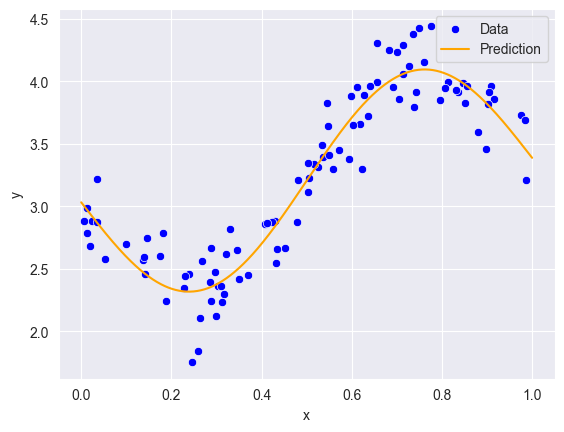

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a scatterplot for the data
sns.scatterplot(x=inputs, y=targets, color="blue", label='Data')

# compute the predictions of the model
x = np.linspace(0, 1, 1000)
y_pred = theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * np.sin(2*np.pi * x) 

# create a lineplot for the predicted model
sns.lineplot(x=x, y=y_pred, color="orange", label='Prediction')

# label your axes and add a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the plot
plt.show()

c) Consider the Ridge regression problem where the parameter $\theta_0$ is not regularized. Derive the closed-form solution to this problem analytically.

Suppose
$$
\boldsymbol{X} =
\begin{bmatrix}
1 & x_1^{(1)} & x_1^{(2)} & x_1^{(D)} \\
1 & x_2^{(1)} & x_2^{(2)} & x_2^{(D)} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_n^{(1)} & x_n^{(2)} & x_n^{(D)} 
\end{bmatrix}
$$
$$
\boldsymbol{\theta} =
\begin{bmatrix}
\theta_0 & \theta_1 & \dots & \theta_D
\end{bmatrix}^t
$$
$$
\boldsymbol{y} =
\begin{bmatrix}
y_1 & y_2 & \dots & y_n
\end{bmatrix}^t
$$
The ridge regression is loss function is defined as

$$
L(\boldsymbol{\theta})=(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})^t(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}) + \boldsymbol{\theta}^t\boldsymbol{\theta}
$$

The goal of not considering $\theta_0$ in the regularization is achieved by not considering it in $\boldsymbol{\theta}^t\boldsymbol{I}\boldsymbol{\theta}$. This can be achieved by a replacement in the normal equation

$$
L(\boldsymbol{\theta})=(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})^t(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}) + \boldsymbol{\theta}^t \boldsymbol{E} \boldsymbol{\theta}
$$

Where

$$
\boldsymbol{E} =
\begin{bmatrix}
0 & 0 & 0 & \dots & 0 \\
0 & 1 & 0 & \dots & 0 \\
0 & 0 & 1 & \dots & 0 \\
\vdots & \vdots & \vdots &  & \vdots \\
0 & 0 & 0 & \dots & 1 \\
\end{bmatrix}
$$

Since the only change was replacing the identity matrix $\boldsymbol{I}$ by $\boldsymbol{E}$, the final solution will be very similar

$$
\hat{\boldsymbol{\theta}}=(\boldsymbol{X}^t\boldsymbol{X}+\lambda\boldsymbol{E})^{-1}\boldsymbol{X}^t\boldsymbol{y}
$$

d) Find the solution to the Ridge regression problem as defined in the previous exercise by completing the code below. The variable `reg` in the code corresponds to the regularization weight $\lambda$.

In [5]:
reg = 10.0  # regularization weight (DO NOT CHANGE)
arr = np.loadtxt("dataset_train.csv", delimiter=",", dtype=float)
inputs, targets = arr[:, 0], arr[:, 1]

# Rename the variable to be more consistent with the previously naming:
x = inputs
y = targets

# Cast the input data into the X matrix format:
x_matrix = np.array([np.ones_like(x), x, x**2, np.sin(2*np.pi*x)], dtype='float').transpose()

# Create the matrix E:
num_atributes = x_matrix.shape[1]
e_matrix = np.eye(num_atributes)
# Remove the entry associated with theta_0:
e_matrix[0, 0] = 0

# Compute the closed-form solution for the non-regularized linear regression:
theta_ridge = np.linalg.inv(x_matrix.T @ x_matrix + e_matrix * reg) @ x_matrix.T @ y

print("theta_ridge =", theta_ridge)

theta_ridge = [ 3.05637954  0.18963518  0.18227539 -0.66656038]


Let's plot the two models together with the training data.

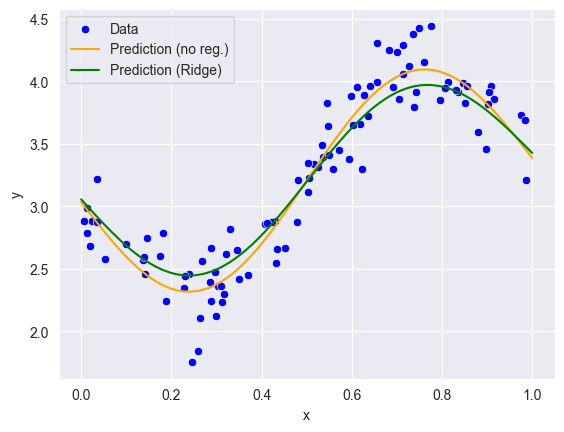

In [6]:
# create a scatterplot for the data
sns.scatterplot(x=inputs, y=targets, color="blue", label='Data')

# compute the predictions of the two models
x = np.linspace(0, 1, 1000)
y_pred = theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * np.sin(2*np.pi * x) 
y_pred_ridge = theta_ridge[0] + theta_ridge[1] * x + theta_ridge[2] * x**2 + theta_ridge[3] * np.sin(2*np.pi * x) 

# create a lineplot for each of the predicted models
sns.lineplot(x=x, y=y_pred, color="orange", label='Prediction (no reg.)')
sns.lineplot(x=x, y=y_pred_ridge, color="green", label='Prediction (Ridge)')

# label your axes and add a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the plot
plt.show()

e) Compute the mean-squared errors (MSE) of the two models in the training set and in a separate test set. You should avoid utilizing for-loops. Use NumPy vectorized operations instead.

In [7]:
# load the training data
arr = np.loadtxt("dataset_train.csv", delimiter=",", dtype=float)
inputs, targets = arr[:, 0], arr[:, 1]

# load the test data
arr = np.loadtxt("dataset_test.csv", delimiter=",", dtype=float)
inputs_test, targets_test = arr[:, 0], arr[:, 1]

# Create anonymous functions to compute the predictions:
y_pred = lambda v: theta[0] + theta[1] * v + theta[2] * v**2 + theta[3] * np.sin(2*np.pi * v)
y_pred_ridge = lambda v: theta_ridge[0] + theta_ridge[1] * v + theta_ridge[2] * v**2 + theta_ridge[3] * np.sin(2*np.pi * v)

# Create an anonymous function to compute the Mean of the Square Errors:
mse = lambda a, b: (np.linalg.norm(a-b)**2)/len(a)

# Compute the MSE for each dataset and model:
mse_train = mse(targets, y_pred(inputs))
mse_train_ridge = mse(targets, y_pred_ridge(inputs))
mse_test = mse(targets_test, y_pred(inputs_test))
mse_test_ridge = mse(targets_test, y_pred_ridge(inputs_test))

#from sklearn.linear_model import Ridge
#import numpy as np
#y = targets
#x = inputs
#X = np.array([x, x**2, np.sin(2*np.pi*x)], dtype='float').transpose()
#clf = Ridge(alpha=10.0)
#clf.fit(X, y)
#print(theta_ridge)
#print(clf.coef_)
#print(clf.intercept_)

print("MSE in the training data:")
print(f"  Linear regression (no reg.): {mse_train:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_train_ridge:.5f}\n")

print("MSE in the test data:")
print(f"  Linear regression (no reg.): {mse_test:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_test_ridge:.5f}\n")

MSE in the training data:
  Linear regression (no reg.): 0.04178
  Ridge regression (lambda = 10.0): 0.05035

MSE in the test data:
  Linear regression (no reg.): 0.02806
  Ridge regression (lambda = 10.0): 0.03817


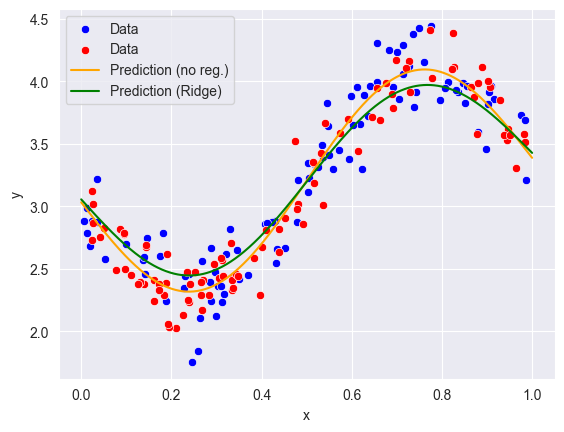

In [8]:
# create a scatterplot for the data
sns.scatterplot(x=inputs, y=targets, color="blue", label='Data')
sns.scatterplot(x=inputs_test, y=targets_test, color="red", label='Data')

# compute the predictions of the two models
x = np.linspace(0, 1, 1000)
y_pred = theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * np.sin(2*np.pi * x) 
y_pred_ridge = theta_ridge[0] + theta_ridge[1] * x + theta_ridge[2] * x**2 + theta_ridge[3] * np.sin(2*np.pi * x) 

# create a lineplot for each of the predicted models
sns.lineplot(x=x, y=y_pred, color="orange", label='Prediction (no reg.)')
sns.lineplot(x=x, y=y_pred_ridge, color="green", label='Prediction (Ridge)')

# label your axes and add a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the plot
plt.show()

f) Based on the errors obtained in the previous question, which of the two models would you prefer? Explain your answer.

**YOUR ANSWER HERE**